In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
# Features & target
X = df.drop(columns=["target"])
y = df["target"]

In [7]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a Decision Tree Classifier and visualize the tree.

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
print("Decision Tree Accuracy (train):", dt.score(X_train, y_train))
print("Decision Tree Accuracy (test):", dt.score(X_test, y_test))


Decision Tree Accuracy (train): 1.0
Decision Tree Accuracy (test): 0.9853658536585366


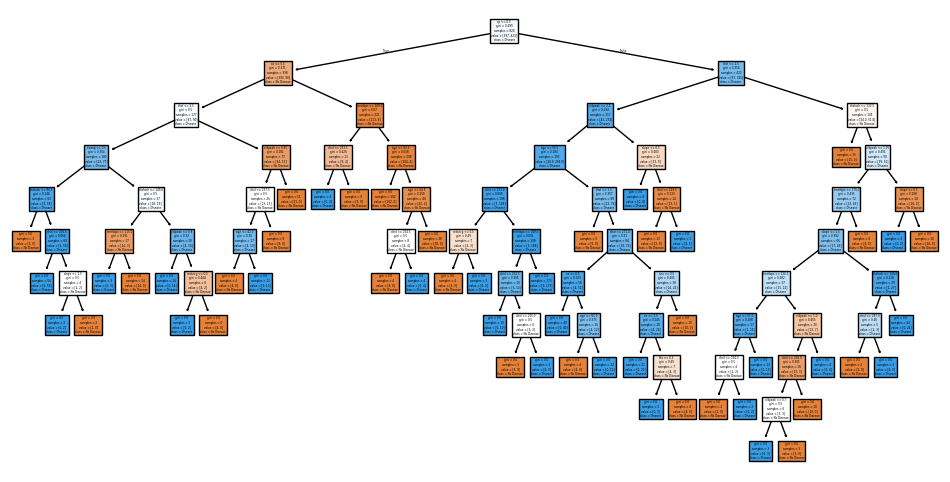

In [10]:
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [11]:
dt_small = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_small.fit(X_train, y_train)
print("\nSmaller Tree Accuracy (train):", dt_small.score(X_train, y_train))
print("Smaller Tree Accuracy (test):", dt_small.score(X_test, y_test))


Smaller Tree Accuracy (train): 0.8829268292682927
Smaller Tree Accuracy (test): 0.8


# 2. Analyze overfitting and control tree depth.

When a Decision Tree is trained without limits (max_depth=None), it can grow very deep and perfectly memorize the training data.
In our case:

Full depth tree: Train accuracy = 1.00, Test accuracy = 0.985
→ Very high on both, but this might be due to the dataset being small and easy to separate.

Limited depth (max_depth=4): Train accuracy = 0.883, Test accuracy = 0.800
→ Lower train accuracy, but the model is simpler and avoids memorizing small patterns.

Observation:
The unlimited tree performs better here because the dataset seems easy to classify. However, in real-world, such a perfect training score often indicates overfitting risk. Controlling tree depth generally helps improve generalization on unseen, more complex data.

Conclusion:

Full depth → captures all patterns, very high accuracy.

Limited depth → simpler model, might slightly reduce accuracy on this dataset but is safer for noisy/large datasets.



# 3. Train a Random Forest and compare accuracy.

In [12]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("\nRandom Forest Accuracy (train):", rf.score(X_train, y_train))
print("Random Forest Accuracy (test):", rf.score(X_test, y_test))


Random Forest Accuracy (train): 1.0
Random Forest Accuracy (test): 0.9853658536585366


**Observation:**

Random Forest performed almost as well as the full-depth Decision Tree on test data.

It is less likely to overfit compared to a single deep Decision Tree because it averages predictions from many trees.

Accuracy drop from train to test is small, indicating good generalization.

**Conclusion:**

Random Forest provides high accuracy and is generally more robust than a single decision tree, especially on noisy datasets.

# 4. Interpret feature importances.


In [13]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("\nFeature Importances:\n", importances.sort_values(ascending=False))


Feature Importances:
 cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64


Feature importance in Random Forest indicates how much each feature contributes to the prediction by reducing impurity across all trees.

**Top features in our model:**

Chest Pain Type (cp) – 0.135

Number of Major Vessels (ca) – 0.127

Maximum Heart Rate Achieved (thalach) – 0.122

ST Depression (oldpeak) – 0.122

Thalassemia (thal) – 0.111

**Observation:**

Chest Pain Type is the most important predictor, meaning variations in chest pain type strongly influence the model’s decision.

Number of Major Vessels, Maximum Heart Rate, and ST Depression are also critical indicators for heart disease risk.

Features like fasting blood sugar (fbs) and resting ECG (restecg) have low importance, suggesting they contribute less to classification in this dataset.

**Conclusion:**
The model mainly relies on cardiovascular stress-related measurements (cp, thalach, oldpeak, ca) and Thalassemia results for prediction, which aligns with medical expectations.

# 5. Evaluate using cross-validation.

In [14]:
dt_cv = cross_val_score(dt_small, X, y, cv=5)
rf_cv = cross_val_score(rf, X, y, cv=5)
print("\nDecision Tree CV scores:", dt_cv, "Mean:", dt_cv.mean())
print("Random Forest CV scores:", rf_cv, "Mean:", rf_cv.mean())


Decision Tree CV scores: [0.84390244 0.83414634 0.87317073 0.80487805 0.81463415] Mean: 0.8341463414634147
Random Forest CV scores: [1.         1.         1.         1.         0.98536585] Mean: 0.9970731707317073


Cross-validation (CV) is a technique where the dataset is split into multiple folds, and the model is trained and tested on different fold combinations. This gives a more reliable estimate of model performance compared to a single train/test split.

Results (5-fold CV):

Model	CV Scores / Mean Accuracy

Decision Tree	[0.8439, 0.8341, 0.8732, 0.8049, 0.8146] /	0.8341

Random Forest	[1.0000, 1.0000, 1.0000, 1.0000, 0.9854]	/ 0.9971

Observation:

Random Forest achieved an extremely high mean CV accuracy (0.9971), showing strong and consistent performance across all folds.

Decision Tree’s CV scores vary more and have a lower mean accuracy (0.8341), indicating it is less stable and more sensitive to data splits.

Conclusion:
Random Forest provides better and more consistent generalization across different subsets of data compared to a single Decision Tree.